# Introduction

Google Trends gives us an estimate of search volume. Let's explore if search popularity relates to other kinds of data. Perhaps there are patterns in Google's search volume and the price of Bitcoin or a hot stock like Tesla. Perhaps search volume for the term "Unemployment Benefits" can tell us something about the actual unemployment rate? 

Data Sources: <br>
<ul>
<li> <a href="https://fred.stlouisfed.org/series/UNRATE/">Unemployment Rate from FRED</a></li>
<li> <a href="https://trends.google.com/trends/explore">Google Trends</a> </li>  
<li> <a href="https://finance.yahoo.com/quote/TSLA/history?p=TSLA">Yahoo Finance for Tesla Stock Price</a> </li>    
<li> <a href="https://finance.yahoo.com/quote/BTC-USD/history?p=BTC-USD">Yahoo Finance for Bitcoin Stock Price</a> </li>
</ul>

# Import Statements

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Read the Data

Download and add the .csv files to the same folder as your notebook.

In [2]:
df_tesla = pd.read_csv("TESLA Search Trend vs Price.csv")

df_btc_search = pd.read_csv("Bitcoin Search Trend.csv")
df_btc_price = pd.read_csv("Daily Bitcoin Price.csv")

df_unemployment = pd.read_csv("UE Benefits Search vs UE Rate 2004-19.csv")

# Data Exploration

### Tesla

**Challenge**: <br>
<ul>
<li>What are the shapes of the dataframes? </li>
<li>How many rows and columns? </li>
<li>What are the column names? </li>
<li>Complete the f-string to show the largest/smallest number in the search data column</li> 
<li>Try the <code>.describe()</code> function to see some useful descriptive statistics</li>
<li>What is the periodicity of the time series data (daily, weekly, monthly)? </li>
<li>What does a value of 100 in the Google Trend search popularity actually mean?</li>
</ul>

In [3]:
display(df_tesla.shape)
df_tesla

(124, 3)

,MONTH,TSLA_WEB_SEARCH,TSLA_USD_CLOSE
0,2010-06-01,3,4.766000
1,2010-07-01,3,3.988000
2,2010-08-01,2,3.896000
3,2010-09-01,2,4.082000
4,2010-10-01,2,4.368000
...,...,...,...
119,2020-05-01,16,167.000000
120,2020-06-01,17,215.962006
121,2020-07-01,24,286.152008
122,2020-08-01,23,498.320007


In [4]:
df_tesla.dtypes

MONTH               object
TSLA_WEB_SEARCH      int64
TSLA_USD_CLOSE     float64
dtype: object

In [5]:
# Max and min searches
search_max = df_tesla["TSLA_WEB_SEARCH"].max()
search_min = df_tesla["TSLA_WEB_SEARCH"].min()

print(f"Smallest value for Tesla in Web Search: {search_min}")
print(f"Largest value for Tesla in Web Search: {search_max}")

Smallest value for Tesla in Web Search: 2
Largest value for Tesla in Web Search: 31


In [6]:
# Describe
df_tesla.describe()

,TSLA_WEB_SEARCH,TSLA_USD_CLOSE
count,124.000000,124.000000
mean,8.725806,50.962145
std,5.870332,65.908389
min,2.000000,3.896000
25%,3.750000,7.352500
50%,8.000000,44.653000
75%,12.000000,58.991999
max,31.000000,498.320007


### Unemployment Data

In [7]:
df_unemployment

,MONTH,UE_BENEFITS_WEB_SEARCH,UNRATE
0,2004-01,34,5.7
1,2004-02,33,5.6
2,2004-03,25,5.8
3,2004-04,29,5.6
4,2004-05,23,5.6
...,...,...,...
176,2018-09,14,3.7
177,2018-10,15,3.8
178,2018-11,16,3.7
179,2018-12,17,3.9


In [8]:
max_ue_search = df_unemployment["UE_BENEFITS_WEB_SEARCH"].max()
print('Largest value for "Unemployemnt Benefits" ' f"in Web Search: {max_ue_search}")

Largest value for "Unemployemnt Benefits" in Web Search: 100


### Bitcoin

In [9]:
df_btc_search

,MONTH,BTC_NEWS_SEARCH
0,2014-09,5
1,2014-10,4
2,2014-11,4
3,2014-12,4
4,2015-01,5
...,...,...
68,2020-05,22
69,2020-06,13
70,2020-07,14
71,2020-08,16


In [10]:
max_btc_search = df_btc_search["BTC_NEWS_SEARCH"].max()

In [11]:
print(f"largest BTC News Search: {max_btc_search}")

largest BTC News Search: 100


# Data Cleaning

### Check for Missing Values

**Challenge**: Are there any missing values in any of the dataframes? If so, which row/rows have missing values? How many missing values are there?

In [12]:
# Are there any missing values?

# Tesla df
has_na_tesla = df_tesla.isna().values.any()

# Unemployment df
has_na_ue = df_unemployment.isna().values.any()

# BTC df
has_na_btc_search = df_btc_search.isna().values.any()


print(f"Missing values for Tesla?: {has_na_tesla}")
print(f"Missing values for U/E?: {has_na_ue}")
print(f"Missing values for BTC Search?: {has_na_btc_search}")

Missing values for Tesla?: False
Missing values for U/E?: False
Missing values for BTC Search?: False


In [13]:
has_na_btc_price = df_btc_price.isna().values.any()
print(f"Missing values for BTC price?: {has_na_btc_price}")

Missing values for BTC price?: True


In [14]:
n_na_btc_price = df_btc_price.isna().values.sum()

print(f"Number of missing values: {n_na_btc_price}")

df_btc_price.loc[df_btc_price["CLOSE"].isna()]
# df_btc_price.isna()

Number of missing values: 2


,DATE,CLOSE,VOLUME
2148,2020-08-04,NaN,NaN


**Challenge**: Remove any missing values that you found. 

In [15]:
df_btc_price.dropna(inplace=True)

### Convert Strings to DateTime Objects

**Challenge**: Check the data type of the entries in the DataFrame MONTH or DATE columns. Convert any strings in to Datetime objects. Do this for all 4 DataFrames. Double check if your type conversion was successful.

In [16]:
# Check df dates data type
display(f"TESLA: {df_tesla['MONTH'].dtype}")
display(f"Unemployment: {df_unemployment['MONTH'].dtype}")
display(f"BTC Search: {df_btc_search['MONTH'].dtype}")
display(f"BTC Price: {df_btc_price['DATE'].dtype}")

'TESLA: object'

'Unemployment: object'

'BTC Search: object'

'BTC Price: object'

In [17]:
df_btc_price

,DATE,CLOSE,VOLUME
0,2014-09-17,457.334015,2.105680e+07
1,2014-09-18,424.440002,3.448320e+07
2,2014-09-19,394.795990,3.791970e+07
3,2014-09-20,408.903992,3.686360e+07
4,2014-09-21,398.821014,2.658010e+07
...,...,...,...
2199,2020-09-24,10745.548828,2.301754e+10
2200,2020-09-25,10702.290039,2.123255e+10
2201,2020-09-26,10754.437500,1.810501e+10
2202,2020-09-27,10774.426758,1.801688e+10


In [18]:
# Convert dates columns type to datetime
df_tesla["MONTH"] = pd.to_datetime(df_tesla["MONTH"])
df_unemployment["MONTH"] = pd.to_datetime(df_unemployment["MONTH"])
df_btc_search["MONTH"] = pd.to_datetime(df_btc_search["MONTH"])
df_btc_price["DATE"] = pd.to_datetime(df_btc_price["DATE"])

In [19]:
# Check df dates data type again
display(f"TESLA: {df_tesla['MONTH'].dtype}")
display(f"Unemployment: {df_unemployment['MONTH'].dtype}")
display(f"BTC Search: {df_btc_search['MONTH'].dtype}")
display(f"BTC Price: {df_btc_price['DATE'].dtype}")
# Notice how "object" is now "datetime[ns]"

'TESLA: datetime64[ns]'

'Unemployment: datetime64[ns]'

'BTC Search: datetime64[ns]'

'BTC Price: datetime64[ns]'

### Converting from Daily to Monthly Data

[Pandas .resample() documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.resample.html) <br>

In [20]:
# Resample daily to monthly by taking the first (using .first()) entries of the months
df_btc_price_monthly = df_btc_price.resample("M", on="DATE").first()
df_btc_price_monthly

,CLOSE,VOLUME
DATE,,
2014-09-30,457.334015,2.105680e+07
2014-10-31,383.614990,2.622940e+07
2014-11-30,325.748993,1.667720e+07
2014-12-31,379.244995,1.176300e+07
2015-01-31,314.248993,8.036550e+06
...,...,...
2020-05-31,8864.766602,4.406839e+10
2020-06-30,10167.268555,3.519890e+10
2020-07-31,9228.325195,1.597155e+10


# Data Visualisation

### Notebook Formatting & Style Helpers

### Tesla Stock Price v.s. Search Volume

**Challenge:** Plot the Tesla stock price against the Tesla search volume using a line chart and two different axes. Label one axis 'TSLA Stock Price' and the other 'Search Trend'. 

In [21]:
df_tesla

,MONTH,TSLA_WEB_SEARCH,TSLA_USD_CLOSE
0,2010-06-01,3,4.766000
1,2010-07-01,3,3.988000
2,2010-08-01,2,3.896000
3,2010-09-01,2,4.082000
4,2010-10-01,2,4.368000
...,...,...,...
119,2020-05-01,16,167.000000
120,2020-06-01,17,215.962006
121,2020-07-01,24,286.152008
122,2020-08-01,23,498.320007


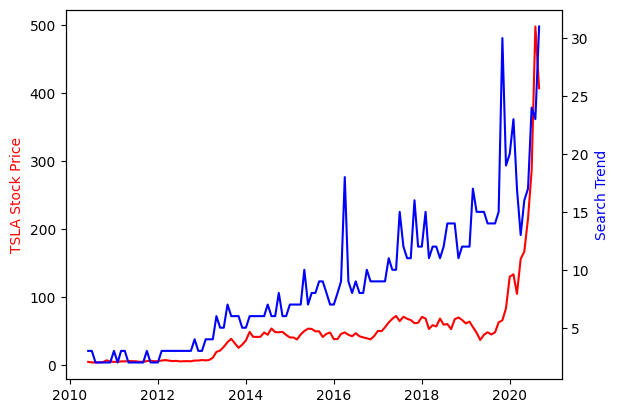

In [22]:
ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.set_ylabel("TSLA Stock Price", color="r")
ax2.set_ylabel("Search Trend", color="b")

ax1.plot(df_tesla["MONTH"], df_tesla["TSLA_USD_CLOSE"], color="r")
ax2.plot(df_tesla["MONTH"], df_tesla["TSLA_WEB_SEARCH"], color="b")

**Challenge**: Add colours to style the chart. This will help differentiate the two lines and the axis labels. Try using one of the blue [colour names](https://matplotlib.org/3.1.1/gallery/color/named_colors.html) for the search volume and a HEX code for a red colour for the stock price. 
<br>
<br>
Hint: you can colour both the [axis labels](https://matplotlib.org/3.3.2/api/text_api.html#matplotlib.text.Text) and the [lines](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.lines.Line2D.html#matplotlib.lines.Line2D) on the chart using keyword arguments (kwargs).  

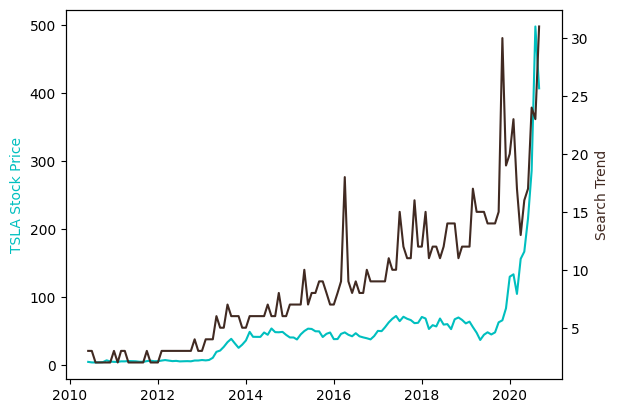

In [23]:
# Actually done accidentally except for the color specifics
ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.set_ylabel("TSLA Stock Price", color="c")
ax2.set_ylabel("Search Trend", color="#412A22")

ax1.plot(df_tesla["MONTH"], df_tesla["TSLA_USD_CLOSE"], color="c")
ax2.plot(df_tesla["MONTH"], df_tesla["TSLA_WEB_SEARCH"], color="#412A22")

**Challenge**: Make the chart larger and easier to read. 
1. Increase the figure size (e.g., to 14 by 8). 
2. Increase the font sizes for the labels and the ticks on the x-axis to 14. 
3. Rotate the text on the x-axis by 45 degrees. 
4. Make the lines on the chart thicker. 
5. Add a title that reads 'Tesla Web Search vs Price'
6. Keep the chart looking sharp by changing the dots-per-inch or [DPI value](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.figure.html). 
7. Set minimum and maximum values for the y and x axis. Hint: check out methods like [set_xlim()](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.set_xlim.html). 
8. Finally use [plt.show()](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.show.html) to display the chart below the cell instead of relying on the automatic notebook output.

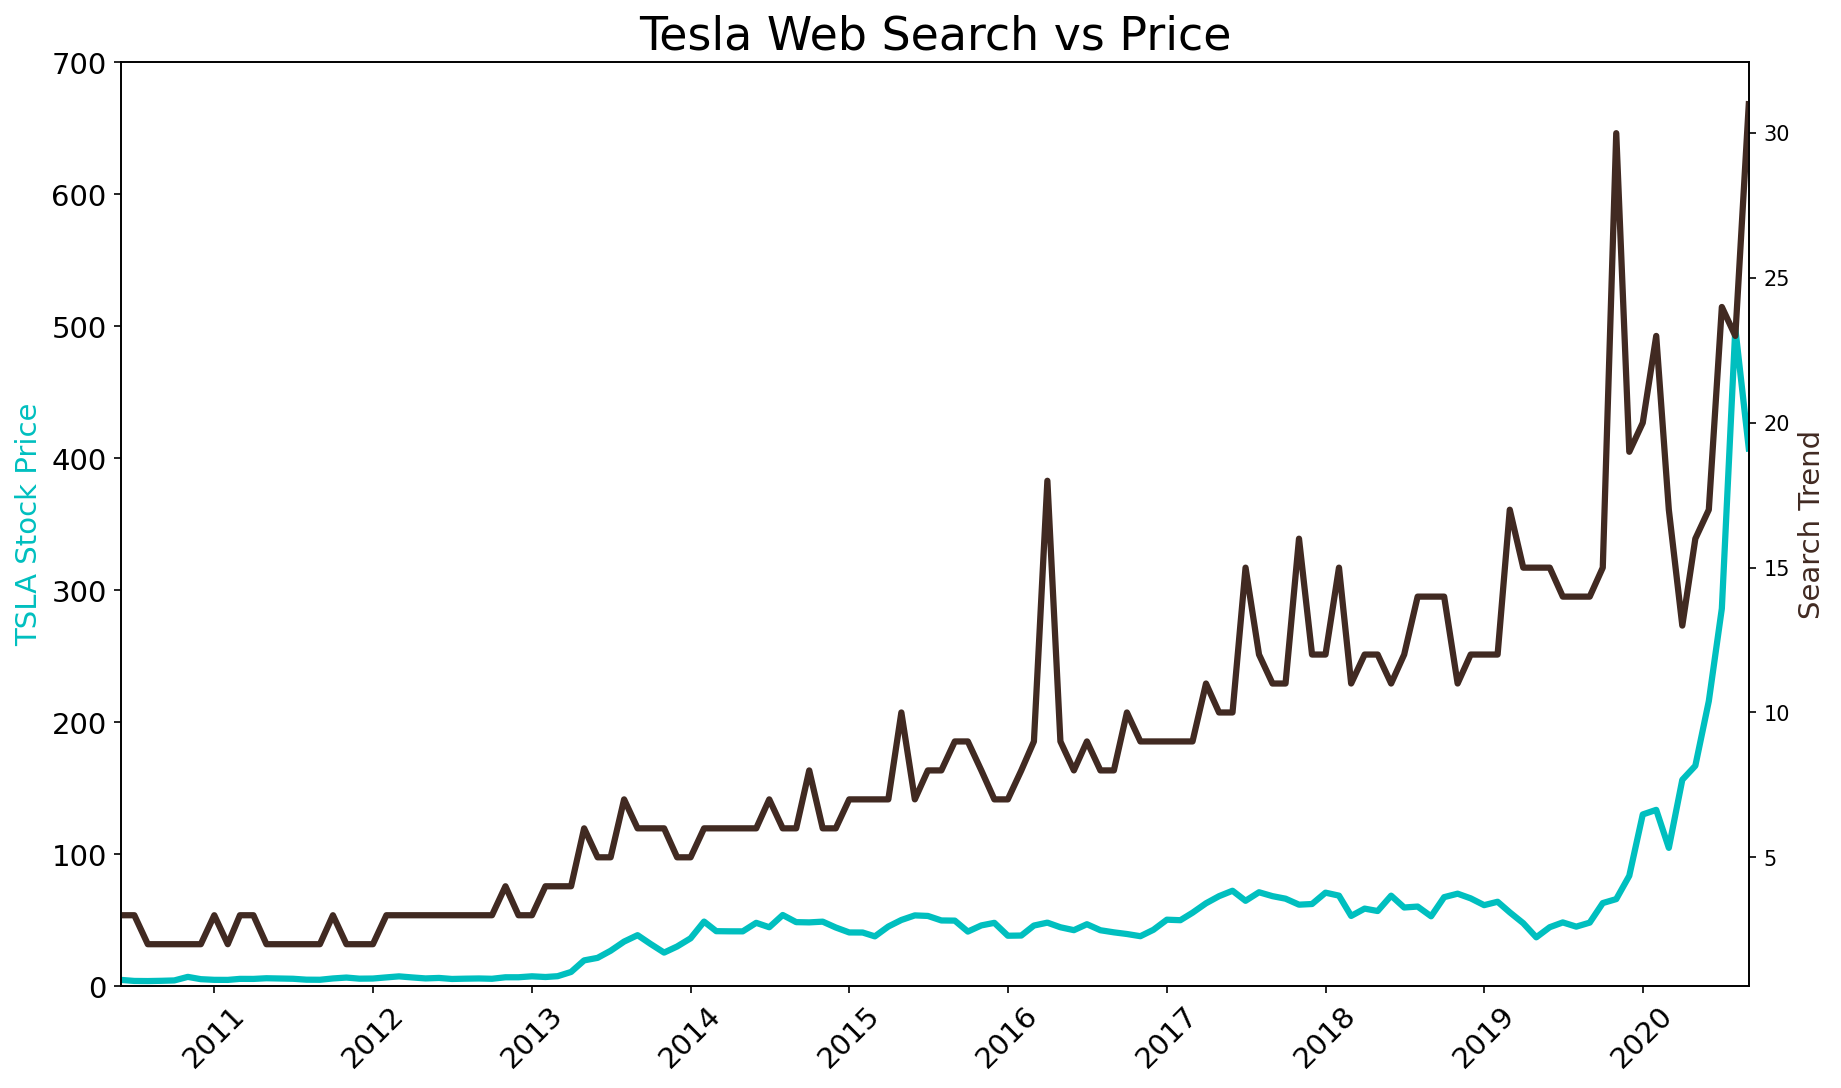

In [24]:
# Actually done accidentally except for the color specifics

# 1, 6
# dpi here is resolution. Higher the number, the higher the resolution
# Also increases file size
plt.figure(figsize=(14, 8), dpi=150)

# 5
plt.title("Tesla Web Search vs Price", fontsize=22)

# 2, 3
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)

ax1 = plt.gca()
ax2 = ax1.twinx()

# 7
x_min = df_tesla["MONTH"].min()
x_max = df_tesla["MONTH"].max()
ax1.set_xlim([x_min, x_max])
ax1.set_ylim([0, 700])

# 2
ax1.set_ylabel("TSLA Stock Price", color="c", fontsize=14)
ax2.set_ylabel("Search Trend", color="#412A22", fontsize=14)

# 4
ax1.plot(df_tesla["MONTH"], df_tesla["TSLA_USD_CLOSE"], color="c", linewidth=3)
ax2.plot(df_tesla["MONTH"], df_tesla["TSLA_WEB_SEARCH"], color="#412A22", linewidth=3)

# 9
plt.show()  # Can't see any difference with or without this on VSCode

How to add tick formatting for dates on the x-axis. 

In [25]:
# Create locators for ticks on the time axis
# Locators basically adds "sub-ticks" (as far as I can tell)
# that allows for easier reading
years = mdates.YearLocator()
months = mdates.MonthLocator()
years_fmt = mdates.DateFormatter("%Y")

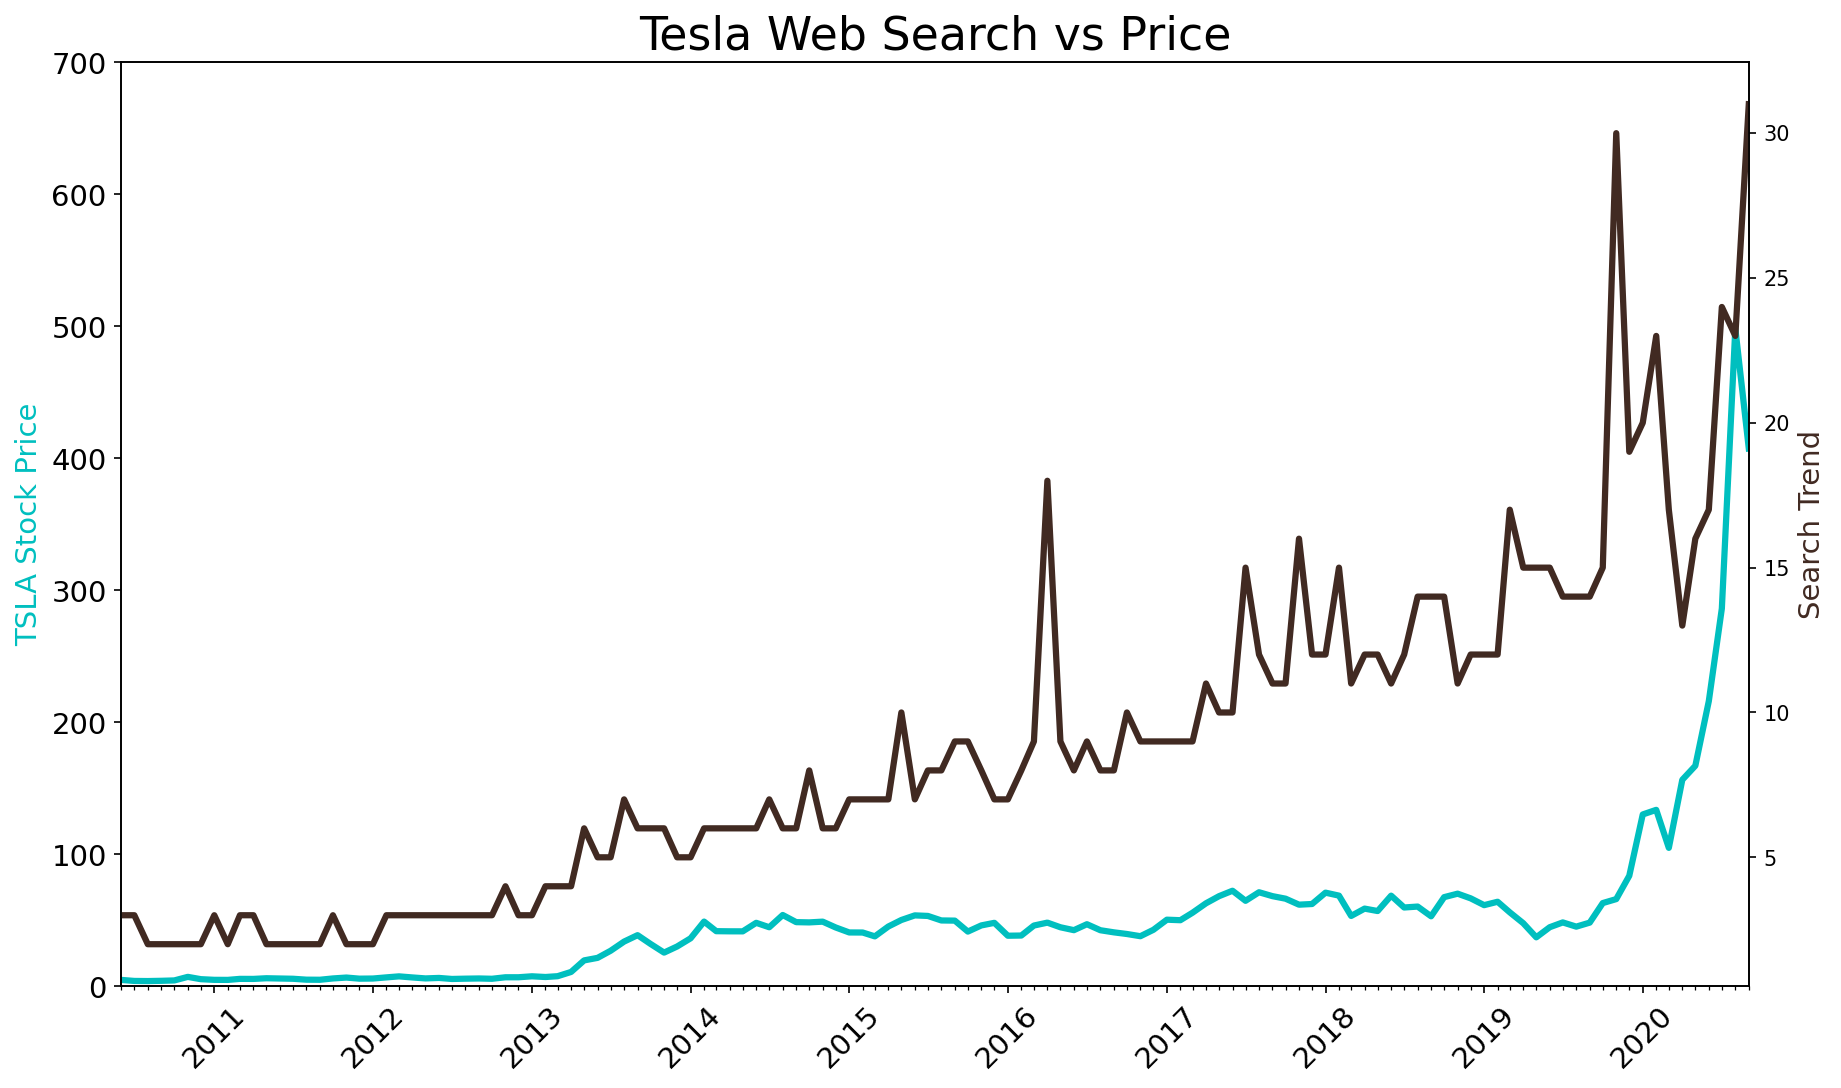

In [26]:
# Same configurations except for commented block

plt.figure(figsize=(14, 8), dpi=150)

plt.title("Tesla Web Search vs Price", fontsize=22)

plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)

ax1 = plt.gca()
ax2 = ax1.twinx()

x_min = df_tesla["MONTH"].min()
x_max = df_tesla["MONTH"].max()
ax1.set_xlim([x_min, x_max])
ax1.set_ylim([0, 700])

ax1.set_ylabel("TSLA Stock Price", color="c", fontsize=14)
ax2.set_ylabel("Search Trend", color="#412A22", fontsize=14)

# New. Formatting ticks
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)
# End of new

ax1.plot(df_tesla["MONTH"], df_tesla["TSLA_USD_CLOSE"], color="c", linewidth=3)
ax2.plot(df_tesla["MONTH"], df_tesla["TSLA_WEB_SEARCH"], color="#412A22", linewidth=3)

plt.show()

### Bitcoin (BTC) Price v.s. Search Volume

**Challenge**: Create the same chart for the Bitcoin Prices vs. Search volumes. <br>
1. Modify the chart title to read 'Bitcoin News Search vs Resampled Price' <br>
2. Change the y-axis label to 'BTC Price' <br>
3. Change the y- and x-axis limits to improve the appearance <br>
4. Investigate the [linestyles](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html ) to make the BTC price a dashed line <br>
5. Investigate the [marker types](https://matplotlib.org/3.2.1/api/markers_api.html) to make the search datapoints little circles <br>
6. Were big increases in searches for Bitcoin accompanied by big increases in the price?

In [27]:
display(df_btc_price_monthly.head())
df_btc_search.head()

,CLOSE,VOLUME
DATE,,
2014-09-30,457.334015,21056800.0
2014-10-31,383.614990,26229400.0
2014-11-30,325.748993,16677200.0
2014-12-31,379.244995,11763000.0
2015-01-31,314.248993,8036550.0


,MONTH,BTC_NEWS_SEARCH
0,2014-09-01,5
1,2014-10-01,4
2,2014-11-01,4
3,2014-12-01,4
4,2015-01-01,5


In [28]:
df_btc_price_monthly.describe()
# For simplicity, lets just make your y limits for CLOSE values
# 0 and 15,000

,CLOSE,VOLUME
count,73.000000,7.300000e+01
mean,4331.055174,7.405022e+09
std,4073.152831,1.097629e+10
min,222.925995,8.036550e+06
25%,435.122986,5.165670e+07
50%,3487.945313,1.653180e+09
75%,7624.910156,1.015779e+10
max,13657.200195,4.406839e+10


**Requirements**
1. Modify the chart title to read 'Bitcoin News Search vs Resampled Price' <br>
2. Change the y-axis label to 'BTC Price' <br>
3. Change the y- and x-axis limits to improve the appearance <br>
4. Investigate the [linestyles](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html ) to make the BTC price a dashed line <br>
5. Investigate the [marker types](https://matplotlib.org/3.2.1/api/markers_api.html) to make the search datapoints little circles <br>
6. Were big increases in searches for Bitcoin accompanied by big increases in the price?

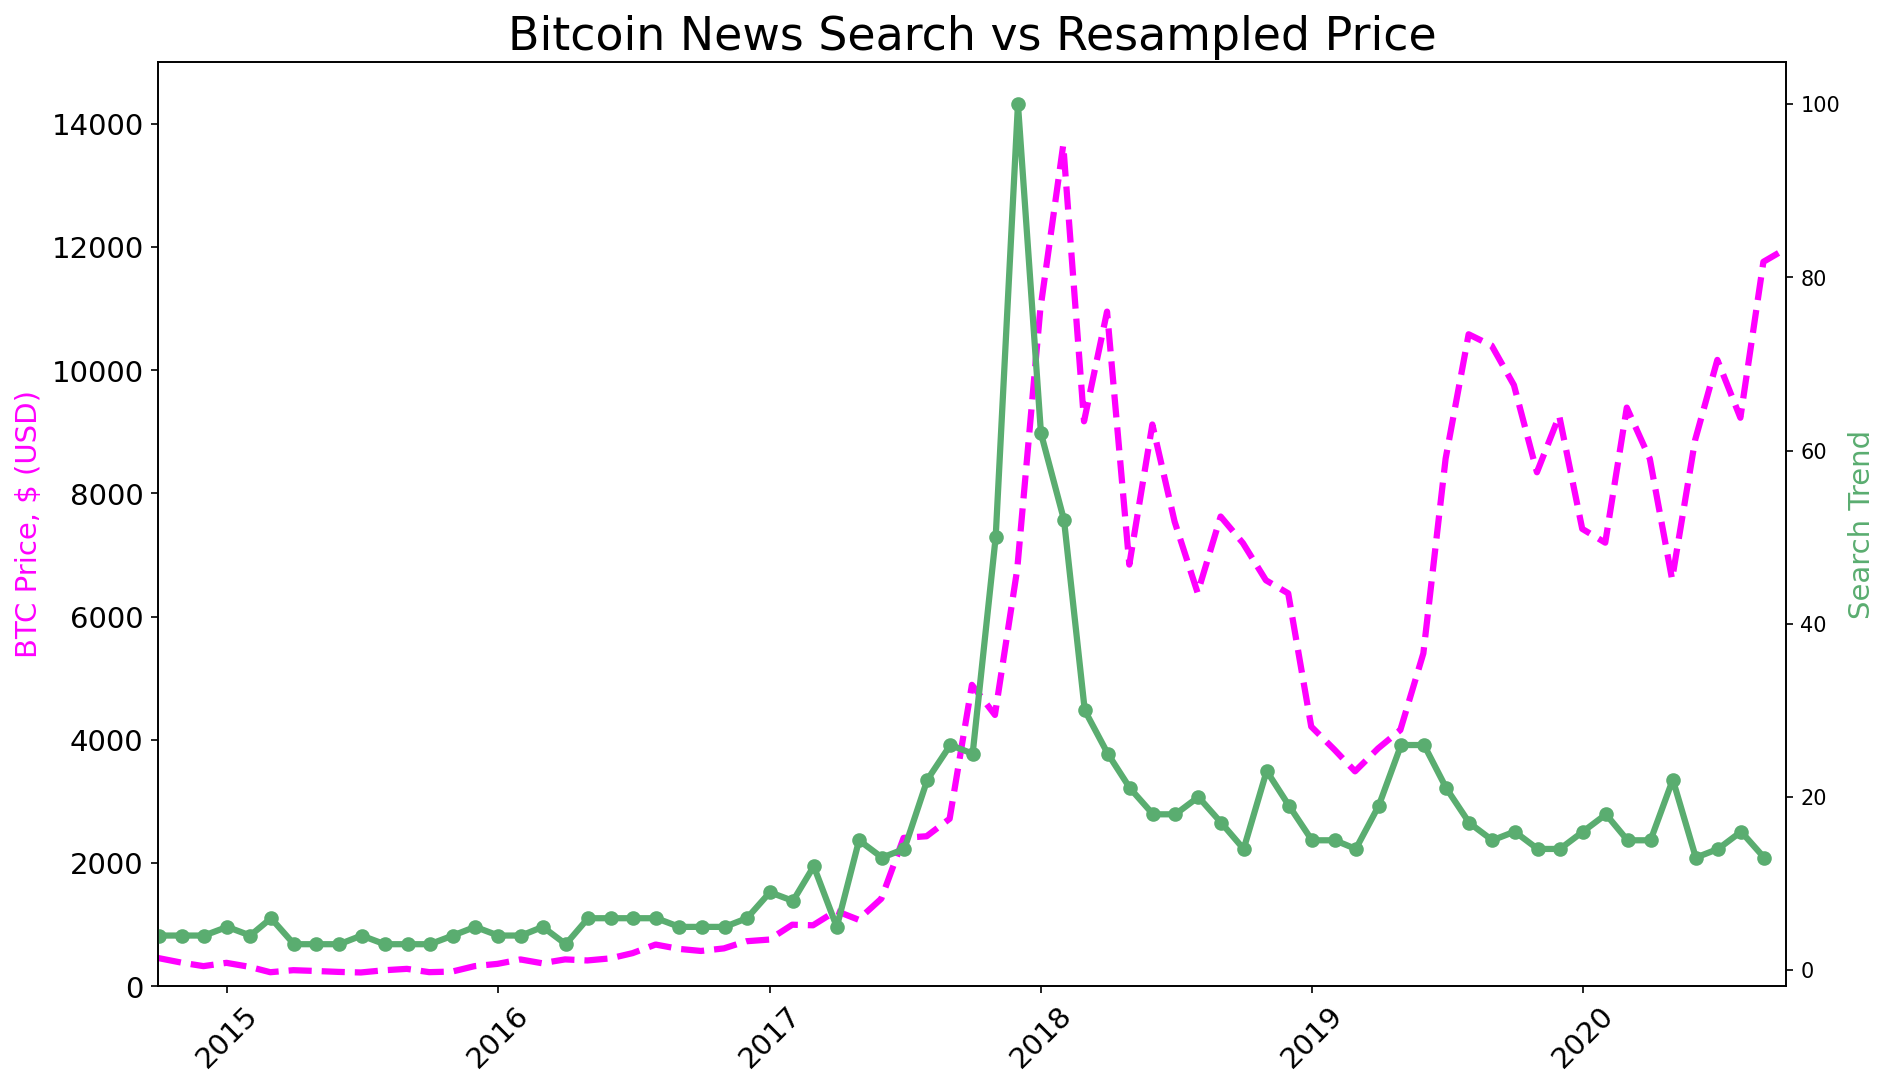

In [29]:
plt.figure(figsize=(14, 8), dpi=150)

# 1
plt.title("Bitcoin News Search vs Resampled Price", fontsize=22)

plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)

ax1 = plt.gca()
ax2 = ax1.twinx()

# 3
x_min = df_btc_price_monthly.index.min()
x_max = df_btc_price_monthly.index.max()
ax1.set_xlim([x_min, x_max])
ax1.set_ylim([0, 15_000])  # Underscore is ignored. It functions as thousands separator

# 2
ax1.set_ylabel("BTC Price, $ (USD)", color="magenta", fontsize=14)

ax2.set_ylabel("Search Trend", color="#5aad70", fontsize=14)

# 4 (linestyle)
ax1.plot(
    df_btc_price_monthly.index,
    df_btc_price_monthly["CLOSE"],
    color="magenta",
    linewidth=3,
    linestyle="dashed",
)

ax2.plot(
    df_btc_search["MONTH"],
    df_btc_search["BTC_NEWS_SEARCH"],
    color="#5aad70",
    linewidth=3,
    marker="o",
)

plt.show()

### Unemployement Benefits Search vs. Actual Unemployment in the U.S.

**Challenge** Plot the search for "unemployment benefits" against the unemployment rate. 
1. Change the title to: Monthly Search of "Unemployment Benefits" in the U.S. vs the U/E Rate <br>
2. Change the y-axis label to: FRED U/E Rate <br>
3. Change the axis limits <br>
4. Add a grey [grid](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.grid.html) to the chart to better see the years and the U/E rate values. Use dashes for the line style<br> 
5. Can you discern any seasonality in the searches? Is there a pattern? 

In [30]:
display(df_unemployment.head())
df_unemployment.describe()

,MONTH,UE_BENEFITS_WEB_SEARCH,UNRATE
0,2004-01-01,34,5.7
1,2004-02-01,33,5.6
2,2004-03-01,25,5.8
3,2004-04-01,29,5.6
4,2004-05-01,23,5.6


,MONTH,UE_BENEFITS_WEB_SEARCH,UNRATE
count,181,181.000000,181.000000
mean,2011-07-02 01:51:22.872928256,35.110497,6.217680
min,2004-01-01 00:00:00,14.000000,3.700000
25%,2007-10-01 00:00:00,21.000000,4.700000
50%,2011-07-01 00:00:00,26.000000,5.400000
75%,2015-04-01 00:00:00,45.000000,7.800000
max,2019-01-01 00:00:00,100.000000,10.000000
std,NaN,20.484925,1.891859


**Requirements**
1. Change the title to: Monthly Search of "Unemployment Benefits" in the U.S. vs the U/E Rate <br>
2. Change the y-axis label to: FRED U/E Rate <br>
3. Change the axis limits <br>
4. Add a grey [grid](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.grid.html) to the chart to better see the years and the U/E rate values. Use dashes for the line style<br> 
5. Can you discern any seasonality in the searches? Is there a pattern? 

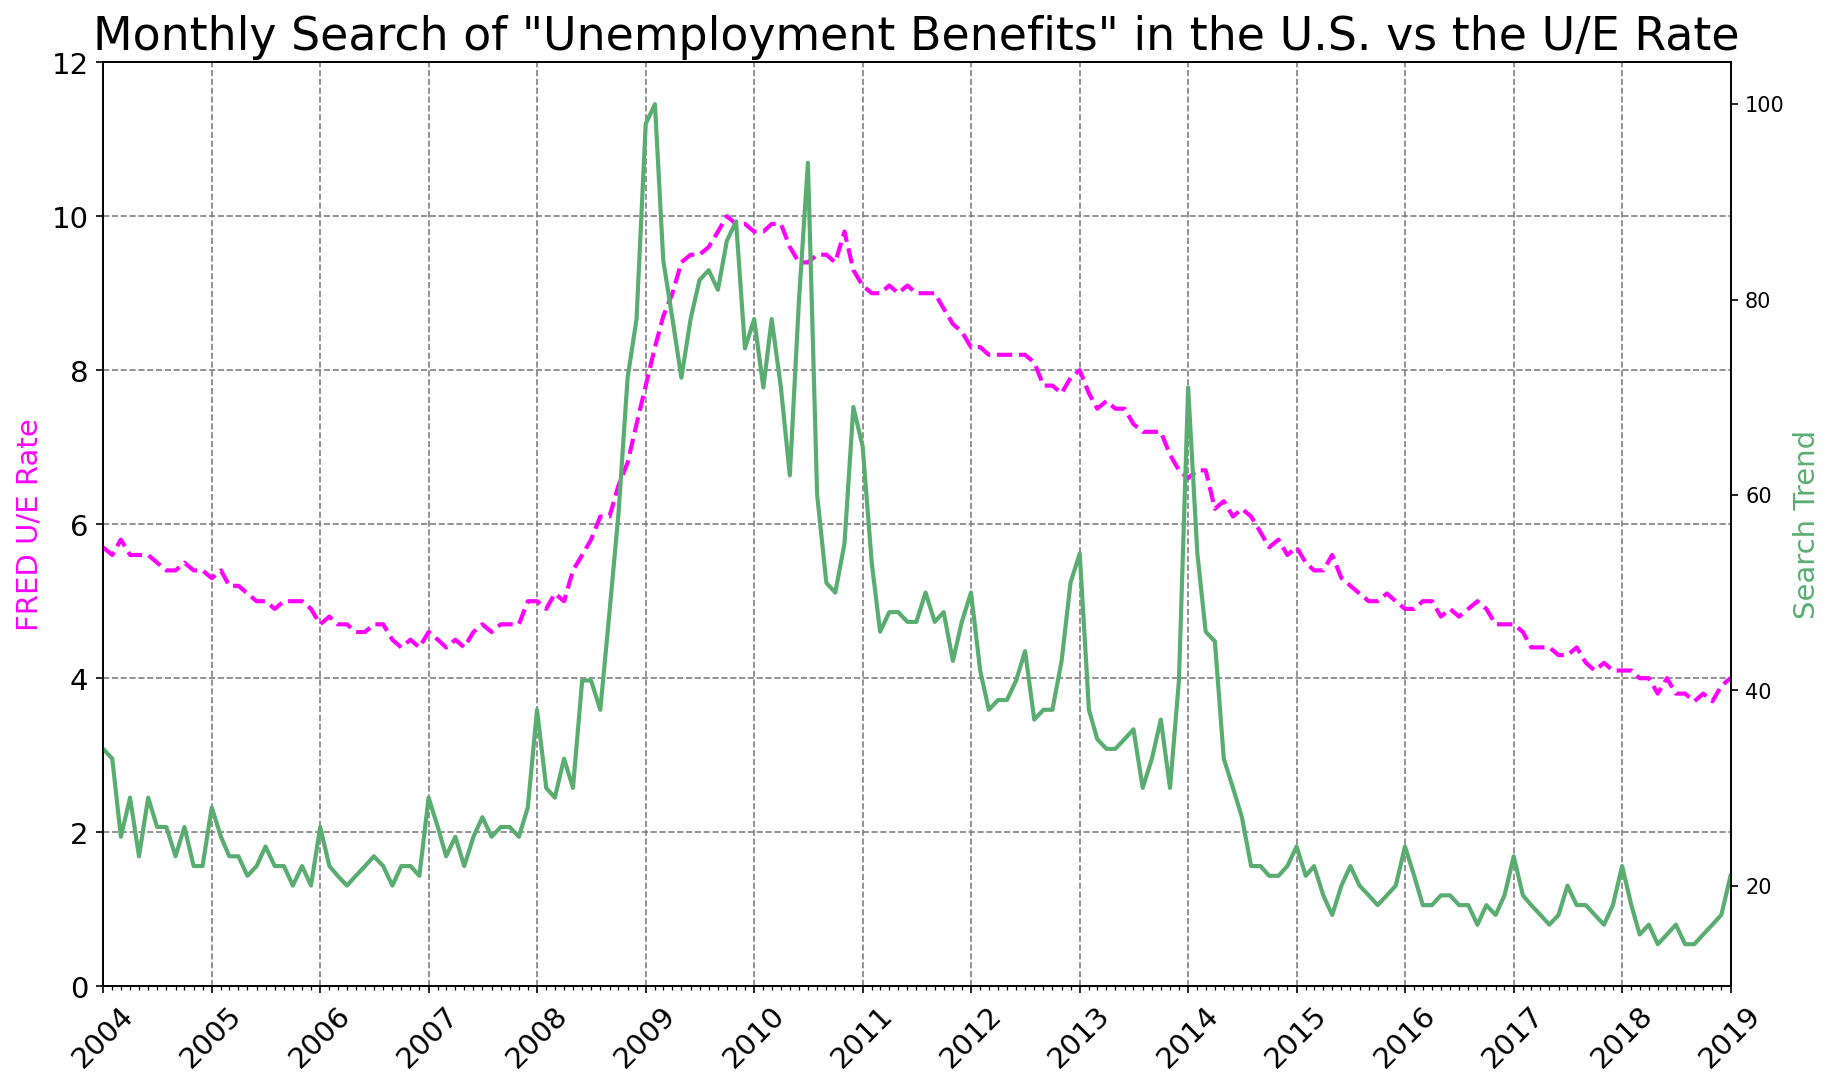

In [31]:
plt.figure(figsize=(14, 8), dpi=150)

# 1
title = 'Monthly Search of "Unemployment Benefits" in the U.S. vs the U/E Rate'
plt.title(title, fontsize=22)

plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)

ax1 = plt.gca()
ax2 = ax1.twinx()

# Locators
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

# 3
x_min = df_unemployment["MONTH"].min()
x_max = df_unemployment["MONTH"].max()
ax1.set_xlim([x_min, x_max])
ax1.set_ylim([0, 12])

# 2
ax1.set_ylabel("FRED U/E Rate", color="magenta", fontsize=14)

ax2.set_ylabel("Search Trend", color="#5aad70", fontsize=14)

# 4
ax1.grid(color="grey", linestyle="dashed")

ax1.plot(
    df_unemployment["MONTH"],
    df_unemployment["UNRATE"],
    color="magenta",
    linewidth=2,
    linestyle="dashed",
)

ax2.plot(
    df_unemployment["MONTH"],
    df_unemployment["UE_BENEFITS_WEB_SEARCH"],
    color="#5aad70",
    linewidth=2,
)

plt.show()

**Challenge**: Calculate the 3-month or 6-month rolling average for the web searches. Plot the 6-month rolling average search data against the actual unemployment. What do you see in the chart? Which line moves first?


In [32]:
# Create rolling mean df from unemployment df with a window of 3
roll_df_unemployment = (
    df_unemployment[["UE_BENEFITS_WEB_SEARCH", "UNRATE"]].rolling(window=3).mean()
)
roll_df_unemployment

,UE_BENEFITS_WEB_SEARCH,UNRATE
0,NaN,NaN
1,NaN,NaN
2,30.666667,5.700000
3,29.000000,5.666667
4,25.666667,5.666667
...,...,...
176,14.666667,3.766667
177,14.333333,3.766667
178,15.000000,3.733333
179,16.000000,3.800000


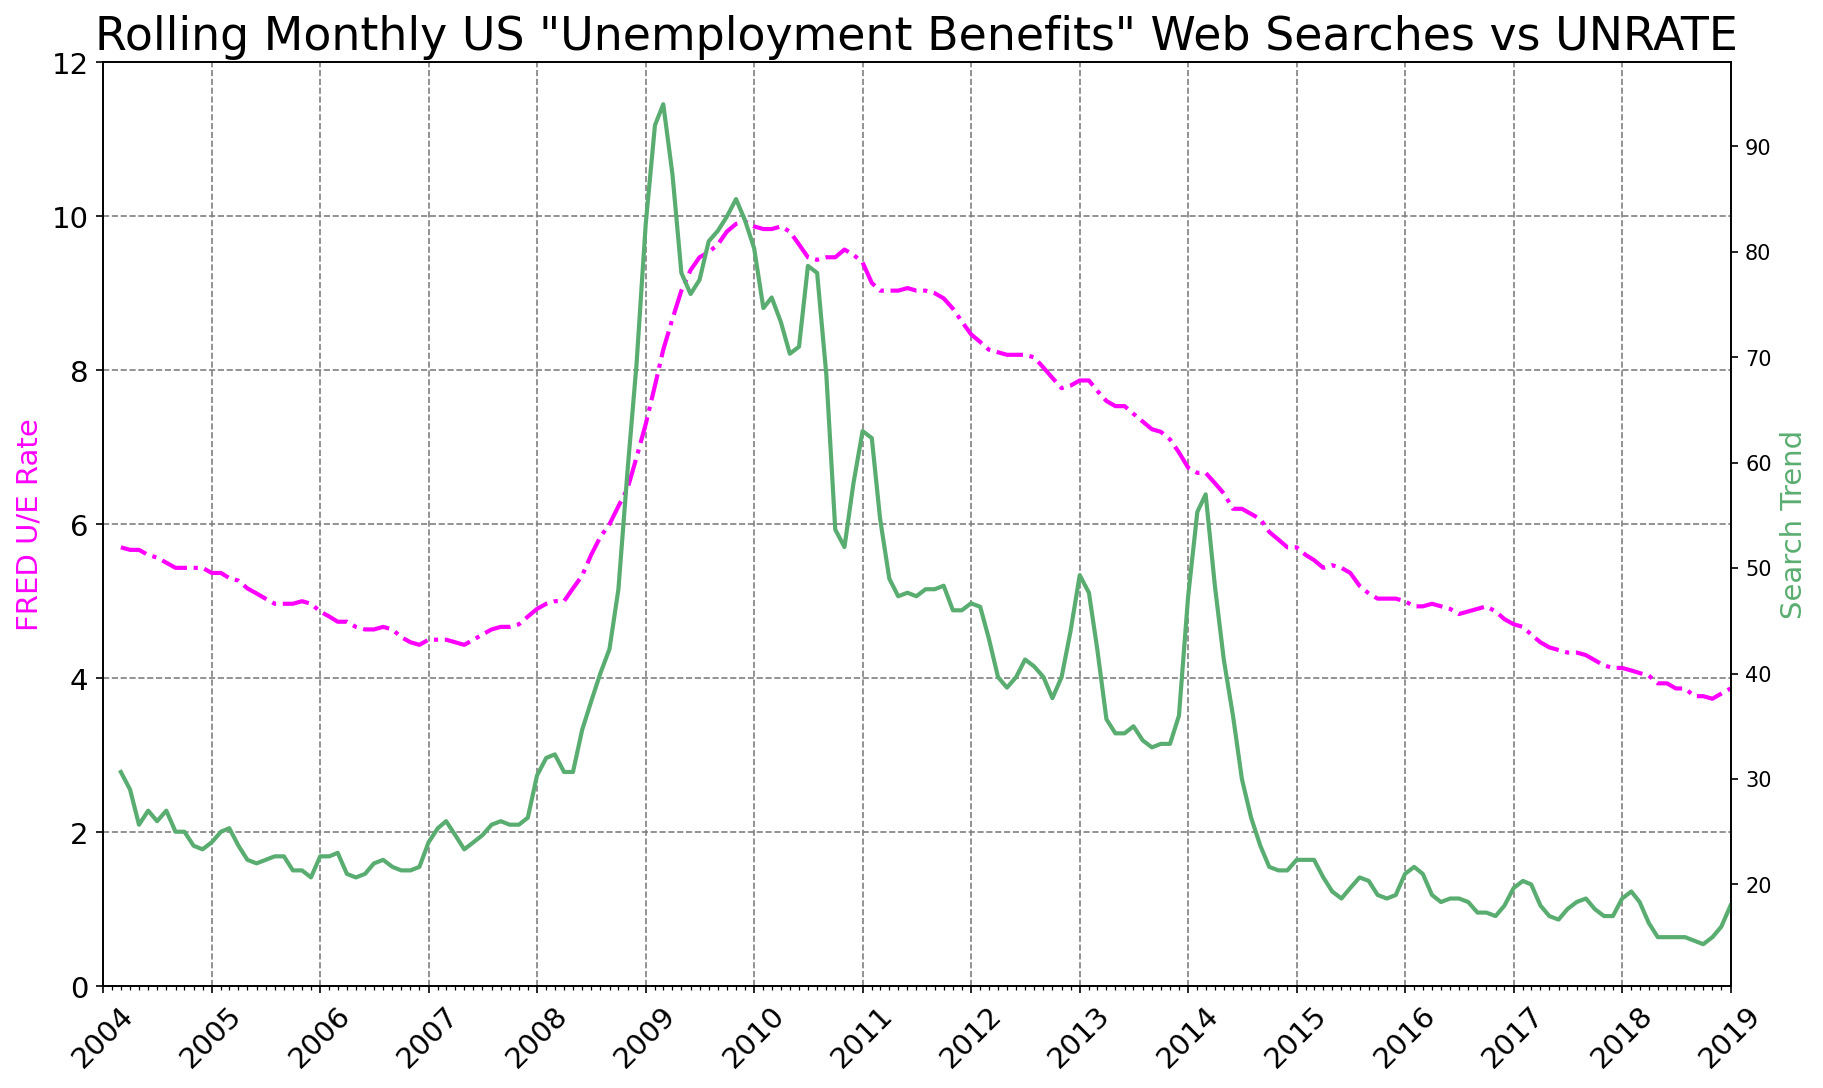

In [33]:
plt.figure(figsize=(14, 8), dpi=150)

title = 'Rolling Monthly US "Unemployment Benefits" Web Searches vs UNRATE'
plt.title(title, fontsize=22)

plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)

ax1 = plt.gca()
ax2 = ax1.twinx()

# Locators
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

x_min = df_unemployment["MONTH"].min()
x_max = df_unemployment["MONTH"].max()
ax1.set_xlim([x_min, x_max])
ax1.set_ylim([0, 12])

ax1.set_ylabel("FRED U/E Rate", color="magenta", fontsize=14)
ax2.set_ylabel("Search Trend", color="#5aad70", fontsize=14)

ax1.grid(color="grey", linestyle="dashed")

ax1.plot(
    df_unemployment["MONTH"],
    roll_df_unemployment["UNRATE"],
    color="magenta",
    linewidth=2,
    linestyle="-.",
)

ax2.plot(
    df_unemployment["MONTH"],
    roll_df_unemployment["UE_BENEFITS_WEB_SEARCH"],
    color="#5aad70",
    linewidth=2,
)

plt.show()

### Including 2020 in Unemployment Charts

**Challenge**: Read the data in the 'UE Benefits Search vs UE Rate 2004-20.csv' into a DataFrame. Convert the MONTH column to Pandas Datetime objects and then plot the chart. What do you see?

In [64]:
df_unemployment_2004_2020 = pd.read_csv(
    "UE Benefits Search vs UE Rate 2004-20.csv",
    parse_dates=["MONTH"],
    date_format=r"%Y-%m",
)
display(df_unemployment_2004_2020.dtypes)
df_unemployment_2004_2020

MONTH                     datetime64[ns]
UE_BENEFITS_WEB_SEARCH             int64
UNRATE                           float64
dtype: object

,MONTH,UE_BENEFITS_WEB_SEARCH,UNRATE
0,2004-01-01,9,5.7
1,2004-02-01,8,5.6
2,2004-03-01,7,5.8
3,2004-04-01,8,5.6
4,2004-05-01,6,5.6
...,...,...,...
195,2020-04-01,100,14.7
196,2020-05-01,63,13.3
197,2020-06-01,53,11.1
198,2020-07-01,54,10.2


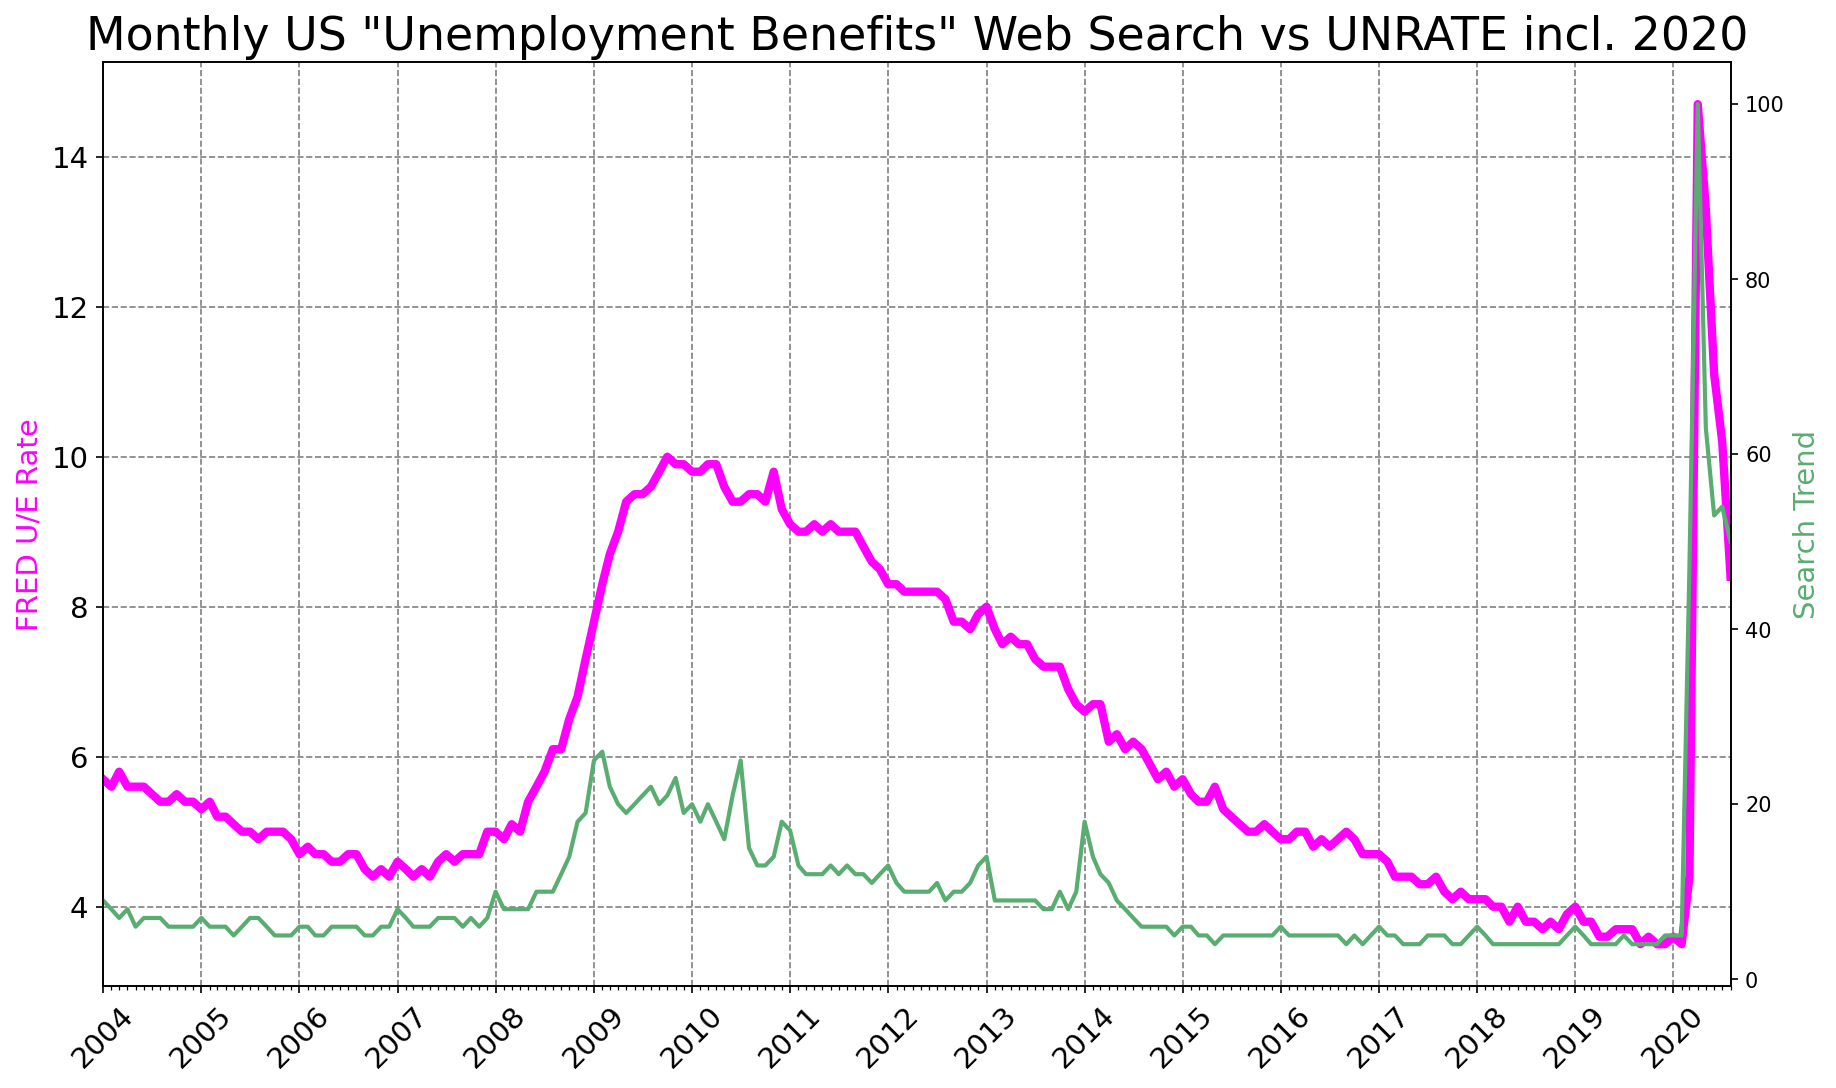

In [78]:
plt.figure(figsize=(14, 8), dpi=150)

title = 'Monthly US "Unemployment Benefits" Web Search vs UNRATE incl. 2020'
plt.title(title, fontsize=22)

plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)

ax1 = plt.gca()
ax2 = ax1.twinx()

# Locators
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

x_min = df_unemployment_2004_2020["MONTH"].min()
x_max = df_unemployment_2004_2020["MONTH"].max()
ax1.set_xlim([x_min, x_max])
# ax1.set_ylim([0, 25])

ax1.set_ylabel("FRED U/E Rate", color="magenta", fontsize=14)
ax2.set_ylabel("Search Trend", color="#5aad70", fontsize=14)

ax1.grid(color="grey", linestyle="dashed")

ax1.plot(
    df_unemployment_2004_2020["MONTH"],
    df_unemployment_2004_2020["UNRATE"],
    color="magenta",
    linewidth=4,
)

ax2.plot(
    df_unemployment_2004_2020["MONTH"],
    df_unemployment_2004_2020["UE_BENEFITS_WEB_SEARCH"],
    color="#5aad70",
    linewidth=2,
)

plt.show()